In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
def bollinger_bands(data, window_size = 30):
    rolling_mean = data['Close'].rolling(window=window_size).mean()
    rolling_std = data['Close'].rolling(window=window_size).std()
    data['UpperBand'] = rolling_mean + (2*rolling_std)
    data['LowerBand'] = rolling_mean - (2*rolling_std)
    return data

In [11]:
def RSI(data, window= 13):
    delta = data['Close'].diff()
    gain = delta.where(delta>0, 0)
    loss = delta.where(delta<0, 0)
    avg_gain = gain.rolling(window).mean()
    avg_loss = loss.rolling(window).mean()
    RS = avg_gain/avg_loss
    RSI = 100 - (100/(1+RS))
    data['RSI'] = RSI
    data['Overbought'] = 70
    data['Oversold'] = 30
    return data

In [69]:
def strategy(data):
    position =-1
    buy_price = []
    sell_price =[]
    position_status=[]
    
    for i in range(len(data)):
        if data['Close'][i] < data['LowerBand'][i] and data['RSI'][i] < data['Oversold'][i] and position == -1:
            position = 1
            position_status.append(position)
            buy_price.append(data['Close'][i])
            sell_price.append(np.nan)
            
        elif data['Close'][i] > data['UpperBand'][i] and data['RSI'][i] > data['Overbought'][i] and position ==1:
            position = -1
            position_status.append(position)
            sell_price.append(data['Close'][i])
            buy_price.append(np.nan)
        else:
            position_status.append(np.nan)
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            
    return(buy_price, sell_price, position_status)

In [70]:
import yfinance as yf

In [71]:
df = yf.download('AAPL','2018-01-01','2023-10-01')

[*********************100%***********************]  1 of 1 completed


In [72]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.722881,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.715782,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.904919,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.370632,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.216969,82271200
...,...,...,...,...,...,...
2023-09-25,174.199997,176.970001,174.149994,176.080002,175.848328,46172700
2023-09-26,174.820007,175.199997,171.660004,171.960007,171.733749,64588900
2023-09-27,172.619995,173.039993,169.050003,170.429993,170.205750,66921800


In [73]:
df = bollinger_bands(df)

In [74]:
df = RSI(df)

In [75]:
df

,Open,High,Low,Close,Adj Close,Volume,UpperBand,LowerBand,RSI,Overbought,Oversold
Date,,,,,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.722881,102223600,NaN,NaN,NaN,70,30
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.715782,118071600,NaN,NaN,NaN,70,30
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.904919,89738400,NaN,NaN,NaN,70,30
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.370632,94640000,NaN,NaN,NaN,70,30
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.216969,82271200,NaN,NaN,NaN,70,30
...,...,...,...,...,...,...,...,...,...,...,...
2023-09-25,174.199997,176.970001,174.149994,176.080002,175.848328,46172700,188.164598,169.618069,-139.678203,70,30
2023-09-26,174.820007,175.199997,171.660004,171.960007,171.733749,64588900,188.249500,169.033167,-170.357846,70,30
2023-09-27,172.619995,173.039993,169.050003,170.429993,170.205750,66921800,188.466890,168.347777,-115.097144,70,30


In [76]:
buy_price, sell_price, position_status = strategy(df)
df['Buy'] = buy_price
df['Sell'] = sell_price
df['Position'] = position_status


In [77]:
df

,Open,High,Low,Close,Adj Close,Volume,UpperBand,LowerBand,RSI,Overbought,Oversold,Buy,Sell,Position
Date,,,,,,,,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.722881,102223600,NaN,NaN,NaN,70,30,NaN,NaN,NaN
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.715782,118071600,NaN,NaN,NaN,70,30,NaN,NaN,NaN
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.904919,89738400,NaN,NaN,NaN,70,30,NaN,NaN,NaN
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.370632,94640000,NaN,NaN,NaN,70,30,NaN,NaN,NaN
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.216969,82271200,NaN,NaN,NaN,70,30,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-25,174.199997,176.970001,174.149994,176.080002,175.848328,46172700,188.164598,169.618069,-139.678203,70,30,NaN,NaN,NaN
2023-09-26,174.820007,175.199997,171.660004,171.960007,171.733749,64588900,188.249500,169.033167,-170.357846,70,30,NaN,NaN,NaN
2023-09-27,172.619995,173.039993,169.050003,170.429993,170.205750,66921800,188.466890,168.347777,-115.097144,70,30,NaN,NaN,NaN


In [78]:
a = df.loc[df['Position']=='1']
        

In [79]:
a

,Open,High,Low,Close,Adj Close,Volume,UpperBand,LowerBand,RSI,Overbought,Oversold,Buy,Sell,Position
Date,,,,,,,,,,,,,,


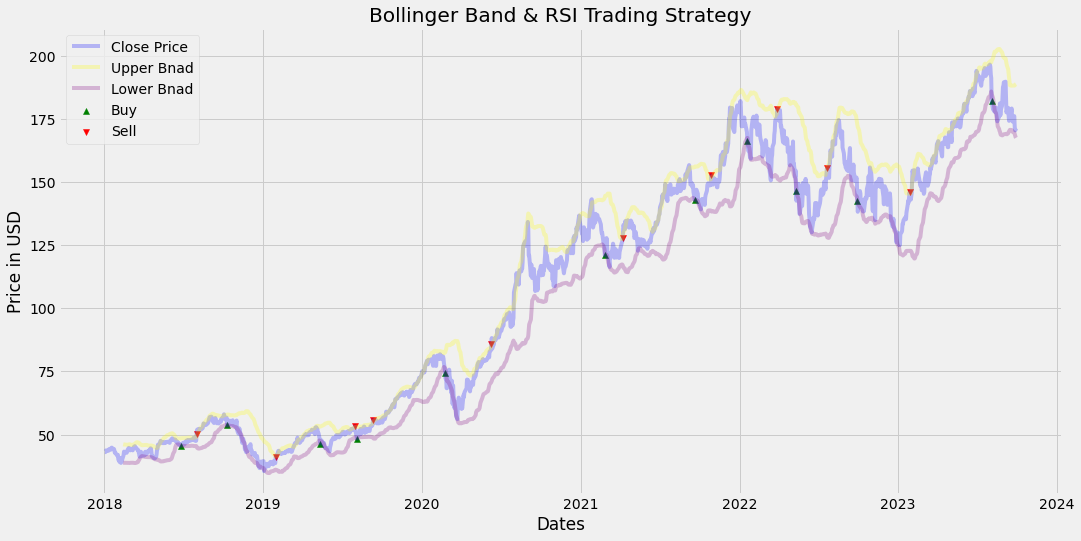

In [82]:
fig, ax = plt.subplots(figsize=(16,8))
plt.title('Bollinger Band & RSI Trading Strategy')
plt.ylabel('Price in USD')
plt.xlabel('Dates')
ax.plot(df['Close'], label = 'Close Price', alpha = 0.25, color ='blue')
ax.plot(df['UpperBand'], label = 'Upper Bnad', alpha = 0.25, color ='yellow')
ax.plot(df['LowerBand'], label = 'Lower Bnad', alpha = 0.25, color ='purple')
#ax.fill_between(df.index, df['UpperBand'], df['LowerBand'], color='grey')
ax.scatter(df.index, df['Buy'], label='Buy', alpha=1, marker='^', color='green')
ax.scatter(df.index, df['Sell'], label='Sell', alpha=1, marker='v', color='red')
plt.legend()
plt.show()

In [81]:
#buydates, selldates = [],[]
buy, sell = [],[]
for row in range(len(df)):
    if df.iloc[row]['Position'] ==1:
        #buydates.append(df.iloc[row]['Date'])
        buy.append(df.iloc[row]['Buy'])
    elif df.iloc[row]['Position'] == -1:
        #selldates.append(df.iloc[row]['Date'])
        sell.append(df.iloc[row]['Sell'])
    
    
#print(buydates)
print(buy)
print(sell)

[45.54249954223633, 53.61249923706055, 46.43000030517578, 48.334999084472656, 74.54499816894531, 120.98999786376953, 142.94000244140625, 166.22999572753906, 146.5, 142.47999572753906, 181.99000549316406]
[50.375, 41.3125, 53.2599983215332, 55.897499084472656, 85.99749755859375, 127.9000015258789, 152.57000732421875, 178.9600067138672, 155.35000610351562, 145.92999267578125]


In [83]:
df_result = pd.DataFrame()
df_result['buy'] = pd.DataFrame(buy)
df_result['sell'] = pd.DataFrame(sell)
df_result['profit'] = df_result['sell'] - df_result['buy']
df_result['cum_profit'] = df_result['profit'].cumsum()

df_result

,buy,sell,profit,cum_profit
0,45.542500,50.375000,4.832500,4.832500
1,53.612499,41.312500,-12.299999,-7.467499
2,46.430000,53.259998,6.829998,-0.637501
3,48.334999,55.897499,7.562500,6.924999
4,74.544998,85.997498,11.452499,18.377499
5,120.989998,127.900002,6.910004,25.287502
6,142.940002,152.570007,9.630005,34.917507
7,166.229996,178.960007,12.730011,47.647518
8,146.500000,155.350006,8.850006,56.497524
9,142.479996,145.929993,3.449997,59.947521
